<a href="https://colab.research.google.com/github/VJurczak/SiOC_lab/blob/main/Skalowanie_obrazow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving panda.jpg to panda (1).jpg


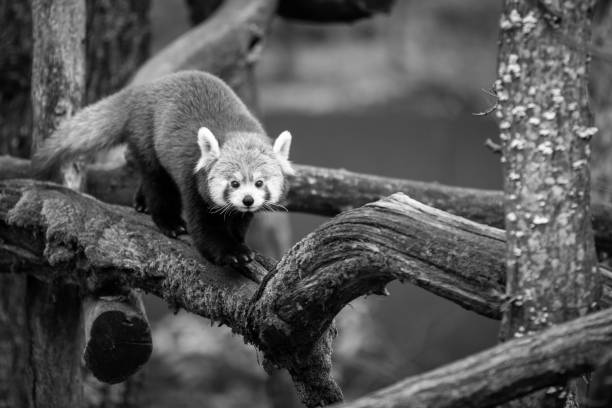

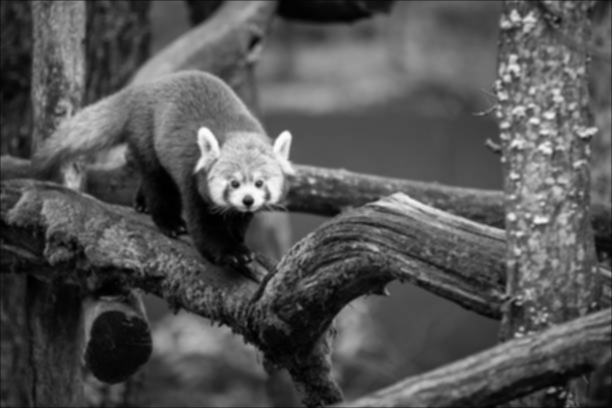

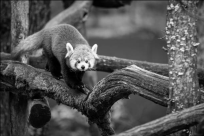

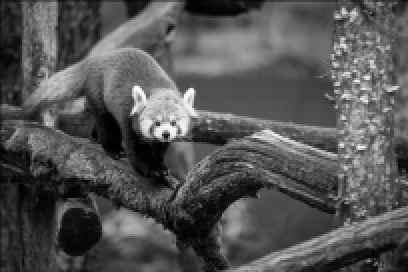

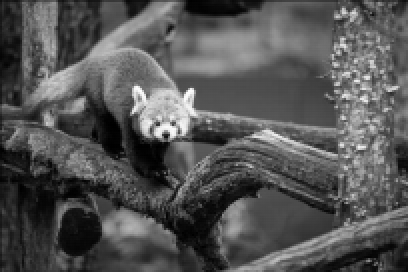

MSE1 (powiększony obraz sin(x)): 10679.940167243369
MSE2 (powiększony obraz f3(x) = sgn(sin(8x))): 10679.003901744521


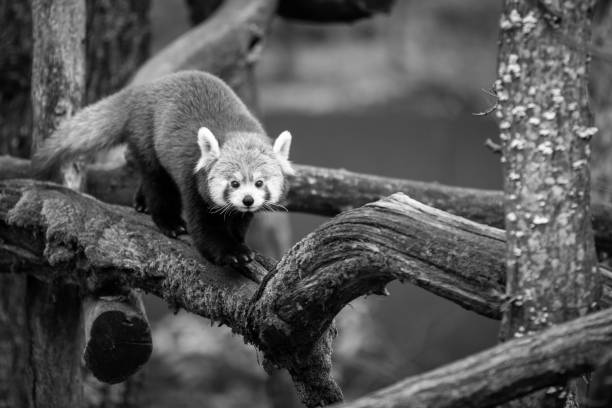

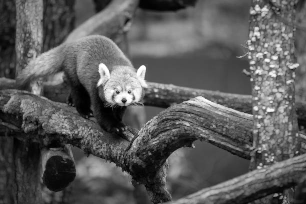

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d
from scipy.signal import convolve2d
from scipy.signal import convolve2d
from google.colab import files
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow


uploaded = files.upload()


file_name = 'panda.jpg'


image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise ValueError("Nie można wczytać obrazu.")


cv2_imshow(image)



kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]]) / 9

scale_factor1=3

blurred_image = convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)
cv2_imshow(blurred_image)

smaller_image = blurred_image[::scale_factor1, ::scale_factor1]
cv2_imshow(smaller_image)




if smaller_image is None:
    raise ValueError("Operacja splotu nie powiodła się.")




image = cv2.imread("panda.jpg", cv2.IMREAD_GRAYSCALE)


scale_factor = 2

# Nowe wymiary obrazu
new_height, new_width = int(smaller_image.shape[0] * scale_factor), int(smaller_image.shape[1] * scale_factor)

# Powiększanie obrazu manualnie za pomocą interpolacji 2D
enlarged_image1 = np.zeros((new_height, new_width), dtype=np.uint8)
enlarged_image2 = np.zeros((new_height, new_width), dtype=np.uint8)


def interpolate_sin(x):
    return np.sin(x)

def interpolate_f3(x):
    return np.sign(np.sin(8 * x))

# Obliczanie MSE między oryginalnym obrazem a powiększonym obrazem
mse1, mse2 = 0, 0

for i in range(new_height):
    for j in range(new_width):
        x, y = i / scale_factor, j / scale_factor
        x1, y1 = int(x), int(y)
        tx, ty = x - x1, y - y1

        # Oblicz wartość interpolacji
        interpolated_value1 = (1 - tx) * (1 - ty) * interpolate_sin(x) + tx * (1 - ty) * interpolate_sin(x + 1) + (1 - tx) * ty * interpolate_sin(y) + tx * ty * interpolate_sin(x + 1)
        interpolated_value2 = (1 - tx) * (1 - ty) * interpolate_f3(x) + tx * (1 - ty) * interpolate_f3(x + 1) + (1 - tx) * ty * interpolate_f3(y) + tx * ty * interpolate_f3(x + 1)


        # Ustawianie wartości piksela w obrazie powiększonym
        enlarged_image1[i, j] = int(smaller_image[x1, y1] + interpolated_value1)
        enlarged_image2[i, j] = int(smaller_image[x1, y1] + interpolated_value2)


        mse1 += (image[x1, y1] - int(interpolated_value1)) ** 2
        mse2 += (image[x1, y1] - int(interpolated_value2)) ** 2

# Normalizacja MSE
mse1 /= (new_height * new_width)
mse2 /= (new_height * new_width)


cv2_imshow(enlarged_image1)
cv2_imshow(enlarged_image2)
print(f"MSE1 (powiększony obraz sin(x)): {mse1}")
print(f"MSE2 (powiększony obraz f3(x) = sgn(sin(8x))): {mse2}")





# Funkcja Max Pooling
def max_pooling(image, scale_factor):
    height, width = image.shape
    new_height, new_width = height // scale_factor, width // scale_factor
    pooled_image = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(0, height - scale_factor + 1, scale_factor):
        for j in range(0, width - scale_factor + 1, scale_factor):
            window = image[i:i+scale_factor, j:j+scale_factor]
            pooled_image[i//scale_factor, j//scale_factor] = np.max(window)

    return pooled_image


smaller_image = max_pooling(image, scale_factor)


cv2_imshow(image)
cv2_imshow(smaller_image)